###Distancia Manhattan

In [178]:
import random
import numpy as np      # Manejo de arreglos (álgebra lineal en Python)
import pandas as pd     # Manejo de Dataframes (tipo de datos)
import matplotlib.pyplot as plt   # Gráficas
import seaborn as sns     ##  gráficas estadísticas (histogramas)

In [179]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSLo2NoEd47ZPZnEeDQBO95NHxvMsUi7YG4nH9DEiDfMJIV2q5Qk0fPQX5J10ClRB7ixPrCbfkTHcTh/pub?output=csv"
data= pd.read_csv(url)

In [180]:
#Imputar datos faltantes para las categorías de GK cambiando NaN por 0
gk_columns = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
data[gk_columns] = data[gk_columns].fillna(0)

In [181]:

columnas_objetivo = ['Name', 'OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration',
       'Sprint Speed', 'Positioning', 'Finishing', 'Shot Power', 'Long Shots',
       'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility',
       'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions',
       'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Weak foot', 'Skill moves', 'Age', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Preferred foot',
       'Nation', 'Position']
columnas = data.columns

for col in columnas:
  if col not in columnas_objetivo:
    data.drop(col, axis = 1, inplace = True)
  else:
    data[col] = data[col]

In [182]:
### Ahora extraeremos los datos
X = data.iloc[:, 1:-1].values  ### filas, columnas
y = data.iloc[:,-1].values
y

array(['ST', 'CDM', 'ST', ..., 'CM', 'CM', 'LM'], dtype=object)

In [183]:
### Codificar el pie preferido como variable numérica
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
le = LabelEncoder()


# Codificar la penúltima columna (Preferred foot)
X[:, -2] = le.fit_transform(X[:, -2])

# Codificar la última columna (Nation)
X[:, -1] = le.fit_transform(X[:, -1])

# Verificar los resultados
print(X[:, -2:])  # Imprimir las últimas dos columnas para verificar la codificación

[[1 50]
 [1 128]
 [0 106]
 ...
 [1 146]
 [0 135]
 [0 37]]


In [184]:
df = pd.DataFrame(X)
for col in df.columns:
    # Convertir a numérico, forzando errores a NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [185]:
X = df.values
X

array([[ 91.,  97.,  90., ...,   0.,   1.,  50.],
       [ 91.,  66.,  80., ...,   0.,   1., 128.],
       [ 91.,  88.,  92., ...,   0.,   0., 106.],
       ...,
       [ 53.,  60.,  58., ...,   0.,   1., 146.],
       [ 53.,  61.,  52., ...,   0.,   0., 135.],
       [ 53.,  60.,  49., ...,   0.,   0.,  37.]])

In [186]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X)
X = imputer.transform(X)
X

array([[ 91.,  97.,  90., ...,   0.,   1.,  50.],
       [ 91.,  66.,  80., ...,   0.,   1., 128.],
       [ 91.,  88.,  92., ...,   0.,   0., 106.],
       ...,
       [ 53.,  60.,  58., ...,   0.,   1., 146.],
       [ 53.,  61.,  52., ...,   0.,   0., 135.],
       [ 53.,  60.,  49., ...,   0.,   0.,  37.]])

In [187]:
X_ = X[:,:-1]  #### Eligiendo todos los datos, excepto la nacionalidad
X_

array([[91., 97., 90., ...,  0.,  0.,  1.],
       [91., 66., 80., ...,  0.,  0.,  1.],
       [91., 88., 92., ...,  0.,  0.,  0.],
       ...,
       [53., 60., 58., ...,  0.,  0.,  1.],
       [53., 61., 52., ...,  0.,  0.,  0.],
       [53., 60., 49., ...,  0.,  0.,  0.]])

In [188]:
from sklearn.decomposition import PCA
# X_ = X[:,:-1]
# Crear un objeto PCA y ajustar los datos
pca = PCA(n_components=3)  # Queremos las tres primeras componentes principales
X_pca = pca.fit_transform(X_)

In [189]:
varianza = pca.explained_variance_ratio_

In [190]:
def distancia_L1(x, c):
    return np.sum(np.abs(x - c))  # Suma de las diferencias absolutas

# Variables de inicialización
k = 4  # Número de clusters
dimension = X_.shape[0]  # Número de puntos
clusters_manuales_l1 = np.zeros(dimension)
distancias = np.zeros((dimension, k))
centroids_l1 = X_[random.sample(range(dimension), k)]
tol = 1e-6
error = 100

# Repetir hasta que los centroides dejen de moverse significativamente
while error > tol:
    # Asignación de puntos a los clusters más cercanos
    for i in range(dimension):
        for j in range(k):
            distancias[i, j] = distancia_L1(X_[i], centroids_l1[j])
        clusters_manuales_l1[i] = np.argmin(distancias[i])

    # Almacenar los centroides previos antes de actualizarlos
    centroids_prev_l1 = np.copy(centroids_l1)

    # Actualizar centroides
    for l in range(k):
        puntos_cluster = X_[clusters_manuales_l1 == l]

        # Si el cluster no está vacío, recalcula el centroide
        if len(puntos_cluster) > 0:
            centroids_l1[l] = np.mean(puntos_cluster, axis=0)
        else:
            # Si el cluster está vacío, puedes dejar el centroide como estaba o reasignarlo a un punto aleatorio
            print(f"Cluster {l} vacío, reasignando centroide aleatoriamente")
            centroids_l1[l] = X_[np.random.choice(dimension)]

    # Calcular el error como el cambio promedio en los centroides
    error = np.mean([distancia_L1(centroids_l1[l], centroids_prev_l1[l]) for l in range(k)])
    print(error)

243.31365285365965
31.318127919326017
15.257942414629143
14.907821976547972
17.245824547516385
22.259697366684534
21.9667259483384
18.63743335242068
15.859967533000892
14.466884912172981
10.761279937396015
7.854931999845257
4.845342201014894
3.873482259577291
3.0097896110540465
2.341716593441315
2.290924020586713
2.1957887643894867
2.171504755273215
2.1999388788090823
1.5061099048548765
1.2181780724887799
1.2137526226724495
1.0292223492494477
0.8993477533821301
0.5186320270219984
0.6105221074347436
0.5592907540290081
0.5586844159771858
0.5368069390200423
0.7011449339386205
0.6785611418985276
0.5529985791655215
0.5626350419786128
0.5481232317717086
0.4141645662867881
0.36619524590671987
0.29207701782208256
0.35810677072936337
0.3063035021199204
0.20509641602157824
0.18627549959611928
0.06431452485917899
0.0


In [191]:
clusters_manuales_l1 = clusters_manuales_l1.astype(int)

In [192]:
import seaborn as sns

def graficar_clusters_PCA2D(clusters, metodo, centroides):
    # Crear una figura de dispersión usando las dos primeras componentes
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, alpha=0.8, edgecolor='w')

    # Graficar los centroides
    plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=100, label='Centroides')

    plt.title(f'Visualización en 2D de la Clusterización (PCA) - {metodo}', fontsize=14)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [193]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def graficar_clusters_PCA3D(clusters, metodo):
    # Crear una figura 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos con borde blanco
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, s=50, alpha=0.9, edgecolor='w')

    # Etiquetas de los ejes y título
    ax.set_title(f'Visualización en 3D de la Clusterización (PCA) ({metodo})', fontsize=18)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    # Añadir la leyenda
    legend = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend)

    # Mostrar el gráfico
    plt.show()

In [194]:
centroids_l1 = np.array(centroids_l1)
centroids_l1 = pca.transform(centroids_l1)

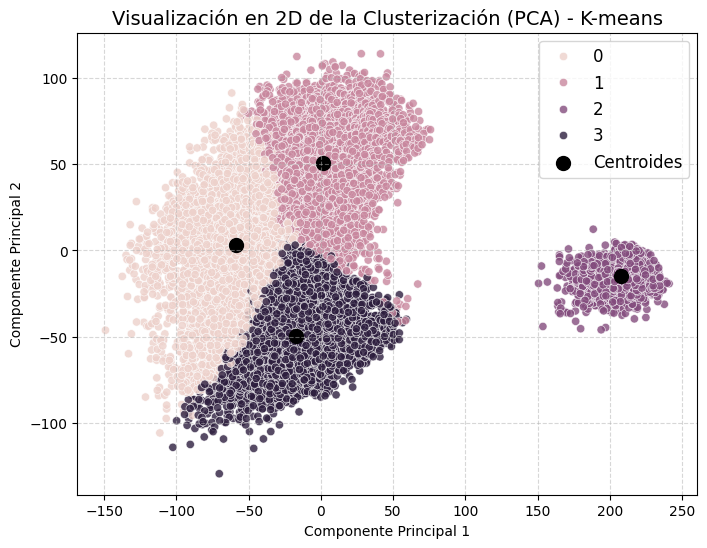

In [195]:
l_1 = graficar_clusters_PCA2D(clusters_manuales_l1, 'K-means', centroids_l1)
l_1

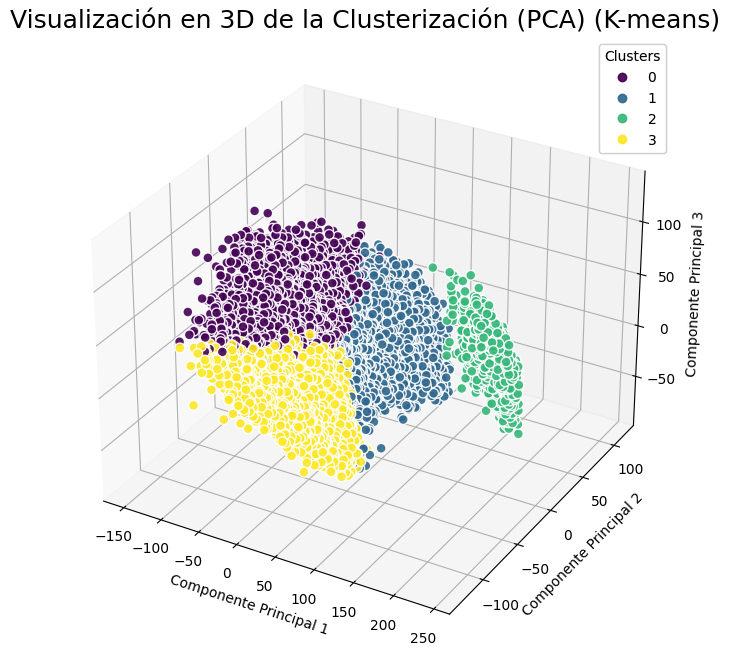

In [196]:

l1_3d = graficar_clusters_PCA3D(clusters_manuales_l1, 'K-means')
l1_3d